In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
custom_colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

In [3]:
df=pd.read_csv("term.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177.0,3.0,NaN,F,44.0,1233.0,1.0
1,1,D,Flight,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,D,Flight,4,2,177.0,3.0,low,F,44.0,1233.0,1.0
3,2,F,Flight,4,5,216.0,2.0,low,M,59.0,3088.0,1.0
4,3,A,Flight,2,2,183.0,4.0,low,M,48.0,3374.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11001 non-null  int64  
 1   Warehouse_block      11001 non-null  object 
 2   Mode_of_Shipment     11001 non-null  object 
 3   Customer_care_calls  11001 non-null  int64  
 4   Customer_rating      11001 non-null  int64  
 5   Cost_of_the_Product  11000 non-null  float64
 6   Prior_purchases      11000 non-null  float64
 7   Product_importance   10999 non-null  object 
 8   Gender               11000 non-null  object 
 9   Discount_offered     11000 non-null  float64
 10  Weight_in_gms        11000 non-null  float64
 11  Reached.on.Time_Y.N  11000 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.0+ MB


In [5]:
#df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype('object')

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    1
Prior_purchases        1
Product_importance     2
Gender                 1
Discount_offered       1
Weight_in_gms          1
Reached.on.Time_Y.N    1
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#Let's also drop ID column
df=df.drop(['ID'],axis=1)

In [9]:
object1 = df.select_dtypes(include='object').columns
float1 = df.select_dtypes(exclude = 'object').columns

In [10]:
i=0
for col in object1:
    x=df[col].unique()
    print(object1[i],x)
    i +=1

Warehouse_block ['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment ['Flight' 'Ship' 'Road']
Product_importance ['low' 'medium' 'high']
Gender ['F' 'M']


In [11]:
#Just assigning names to binary values
def Reached_yn(i):
    if i==0:
        return "On Time"
    return "Delayed"
df['Reached']=df['Reached.on.Time_Y.N'].apply(Reached_yn)
df['Reached'].unique() 

array(['Delayed', 'On Time'], dtype=object)

In [12]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
2,D,Flight,4,2,177.0,3.0,low,F,44.0,1233.0,1.0,Delayed
3,F,Flight,4,5,216.0,2.0,low,M,59.0,3088.0,1.0,Delayed
4,A,Flight,2,2,183.0,4.0,low,M,48.0,3374.0,1.0,Delayed
5,B,Flight,3,3,176.0,4.0,medium,M,10.0,1177.0,1.0,Delayed
6,C,Flight,2,2,184.0,3.0,medium,F,46.0,2484.0,1.0,Delayed


In [13]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


It's observed that Prior_purchases and Discount_offered	are drastically changes after 75th percentile. Let's analyze more.

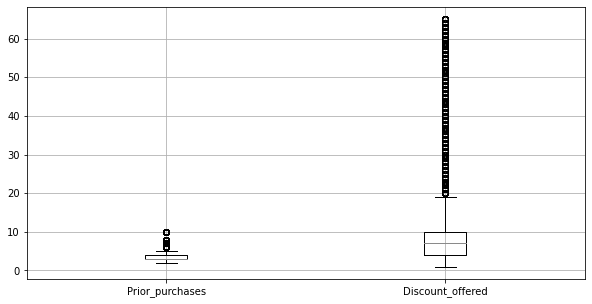

In [14]:
plt.figure(figsize=(10,5))
boxplot = df.boxplot(column=['Prior_purchases','Discount_offered'])

Prior purchase and discount offered has some outliers whi needs to be treated so that model doesn't get affected.

In [15]:
print(df[['Prior_purchases','Discount_offered']].quantile(0.75))
print(df[['Prior_purchases','Discount_offered']].quantile(0.80))
print(df[['Prior_purchases','Discount_offered']].quantile(0.85))
print(df[['Prior_purchases','Discount_offered']].quantile(0.90))
print(df[['Prior_purchases','Discount_offered']].quantile(0.95))
print(df[['Prior_purchases','Discount_offered']].quantile(0.99))

Prior_purchases      4.0
Discount_offered    10.0
Name: 0.75, dtype: float64
Prior_purchases      5.0
Discount_offered    20.0
Name: 0.8, dtype: float64
Prior_purchases      5.0
Discount_offered    32.0
Name: 0.85, dtype: float64
Prior_purchases      5.0
Discount_offered    44.0
Name: 0.9, dtype: float64
Prior_purchases      6.0
Discount_offered    54.0
Name: 0.95, dtype: float64
Prior_purchases     10.0
Discount_offered    63.0
Name: 0.99, dtype: float64


In [16]:
print(len(df[df['Prior_purchases']>=10]))
print(len(df[df['Discount_offered']>=20]))

178
2209


Since the count of outliers very less for prior purchase, removing them straight from data. Discount offered having around 15-20% outliers. this needs some treatment. 
Considering discount offered 75th percentile value as max
and replacing higher discounts with it in below code. We could also apply mean/meadian to treat those but let's assume that these are higher discount orders and considering accordingly

In [17]:
#df['Discount_offered'].filter(lambda x: '13' if x>=13 else x)
df['Discount_offered'].mask(df['Discount_offered']>=13,13,inplace=True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
2,D,Flight,4,2,177.0,3.0,low,F,13.0,1233.0,1.0,Delayed
3,F,Flight,4,5,216.0,2.0,low,M,13.0,3088.0,1.0,Delayed
4,A,Flight,2,2,183.0,4.0,low,M,13.0,3374.0,1.0,Delayed
5,B,Flight,3,3,176.0,4.0,medium,M,10.0,1177.0,1.0,Delayed
6,C,Flight,2,2,184.0,3.0,medium,F,13.0,2484.0,1.0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
10996,A,Ship,4,1,252.0,5.0,medium,F,1.0,1538.0,1.0,Delayed
10997,B,Ship,4,1,232.0,5.0,medium,F,6.0,1247.0,0.0,On Time
10998,C,Ship,5,4,242.0,5.0,low,F,4.0,1155.0,0.0,On Time
10999,F,Ship,5,2,223.0,6.0,medium,M,2.0,1210.0,0.0,On Time


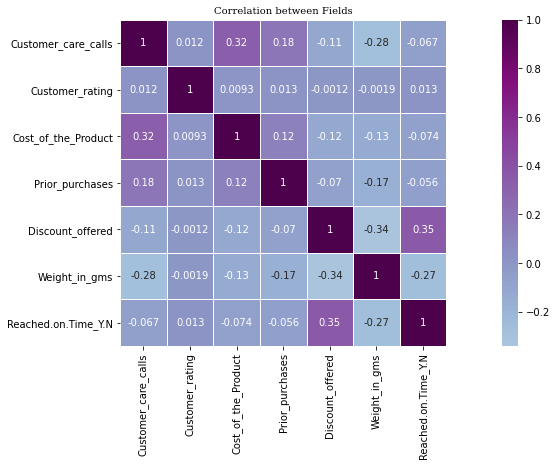

In [18]:
plt.figure(figsize=(20,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)

plt.title('Correlation between Fields', fontsize=20,font="Serif")
plt.show()

It's clear that there are no strong correlation between variables

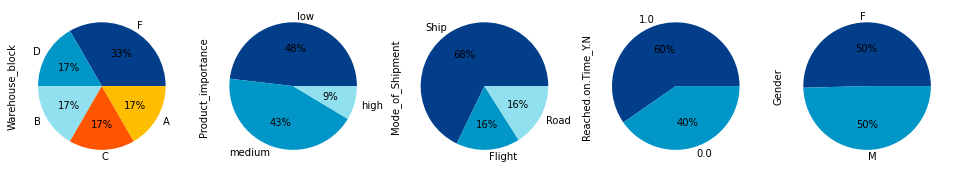

In [19]:
#Categorical Data Analysis
Data = df[['Warehouse_block','Product_importance','Mode_of_Shipment','Reached.on.Time_Y.N','Gender']]
i = 1
plt.figure(figsize=(20,12))
for col in Data:
    plt.subplot(3,6,i)
    x=Data[col].value_counts()
    plot = x.plot.pie(fontsize=10, autopct='%1.0f%%')
    i +=1

Observations: 
    1. F blcok delivers almost 1/3 of total orders
    2. 91% products are medium to low importance. 
    2. Ships are delivering major chunk of products.
    4. almost 60% products are getting delayed
    5. No trend found in gender purchasing scenario

In [20]:
df.groupby(['Mode_of_Shipment','Reached'])['Cost_of_the_Product'].sum()

Mode_of_Shipment  Reached
Flight            Delayed    220845.0
                  On Time    151093.0
Road              Delayed    214276.0
                  On Time    156161.0
Ship              Delayed    925318.0
                  On Time    644262.0
Name: Cost_of_the_Product, dtype: float64

In [21]:
# creating pivot table to anaylze more
shipment=df.loc[:,['Mode_of_Shipment','Reached','Cost_of_the_Product','Weight_in_gms']]
shipment
table = pd.pivot_table(shipment, index=['Mode_of_Shipment','Reached']
        ,values=['Reached','Cost_of_the_Product'
                 ,'Weight_in_gms']
                 ,aggfunc = {'Reached':np.size
                             ,'Cost_of_the_Product':np.sum
                             ,'Weight_in_gms':np.sum}     
                      )

table['% Reached'] = (table.Reached / table.Reached.sum() * 100).astype(str) + '%'
table['% Weight'] = (table.Weight_in_gms / table.Weight_in_gms.sum() * 100).astype(str) + '%'
table

Cost_of_the_Product  Reached  Weight_in_gms  \
Mode_of_Shipment Reached                                                
Flight           Delayed             220845.0     1069      3534655.0   
                 On Time             151093.0      708      2914750.0   
Road             Delayed             214276.0     1035      3434196.0   
                 On Time             156161.0      725      2989013.0   
Ship             Delayed             925318.0     4459     14509486.0   
                 On Time             644262.0     3003     12588450.0   

                                    % Reached            % Weight  
Mode_of_Shipment Reached                                           
Flight           Delayed   9.719065369579052%   8.84314826791225%  
                 On Time  6.4369488135285025%  7.292243914582111%  
Road             Delayed   9.409946358759887%  8.591815724327036%  
                 On Time   6.591508318938086%  7.478038205628894%  
Ship             Delayed  40.540049095372304%  36.30044119983338%  
                 On Time  27.302482043822167%  31.49431268771633%

Ships are causing more delay in delivering products but it's also the only mode that is delivery very high weighted products having almost 36.3+31.4= 67.7 %  of weight out of total and 7462 products out of 10999 products

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

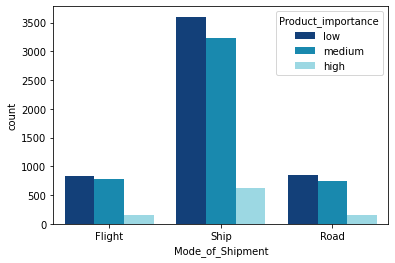

In [22]:
#Let's also see how much of important products are getting delivered by all modes
sns.countplot(x='Mode_of_Shipment',hue='Product_importance',data=df)

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

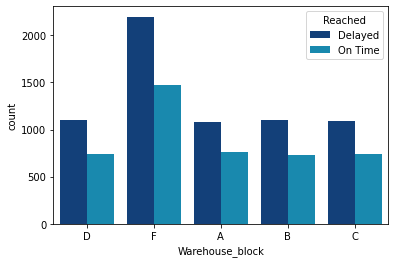

In [23]:
#Which warehouse block is delivering more products on time and which one is delaying 
sns.countplot(x='Warehouse_block',hue='Reached',data=df)

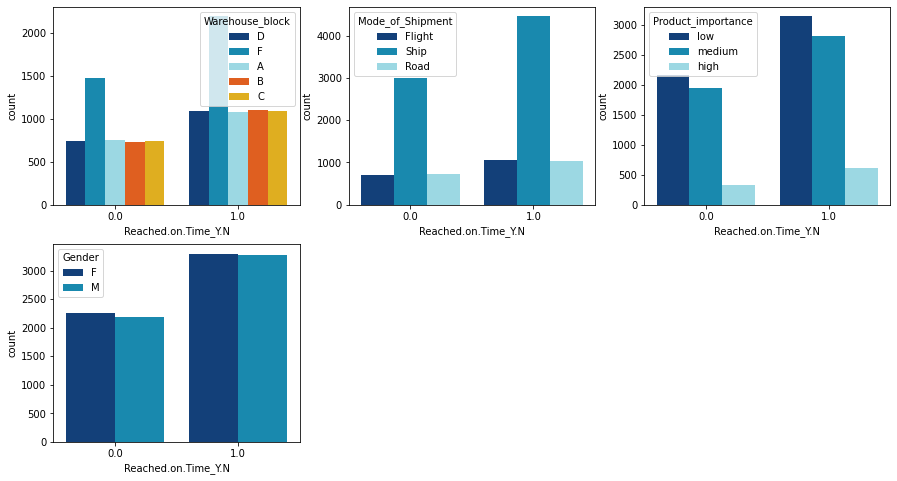

In [24]:
i = 1
plt.figure(figsize = (15,8))
for col in object1:
    plt.subplot(2,3,i)
    sns.countplot(x = 'Reached.on.Time_Y.N',hue = df[col] , data = df)
    i +=1

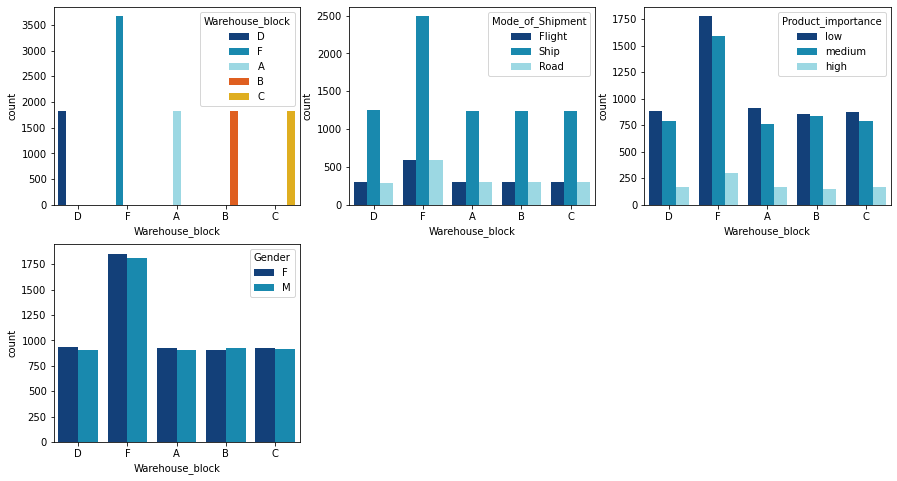

In [25]:
i = 1
plt.figure(figsize = (15,8))
for col in object1:
    plt.subplot(2,3,i)
    sns.countplot(x = 'Warehouse_block',hue = df[col] , data = df)
    i +=1

These results indicates that warehouse block F has most contribution in delivering products, 
it seems to be a bigger warehouse than others maybe.


<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='count'>

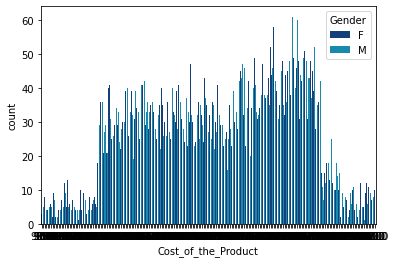

In [26]:
sns.countplot(data=df,x='Cost_of_the_Product',hue='Gender')

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Cost_of_the_Product'>

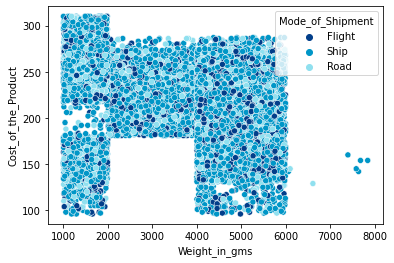

In [27]:
#Bivariate analysis - product Weight vs cost based on importance of product
sns.scatterplot(data=df,x='Weight_in_gms',y='Cost_of_the_Product',hue='Mode_of_Shipment')

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Cost_of_the_Product'>

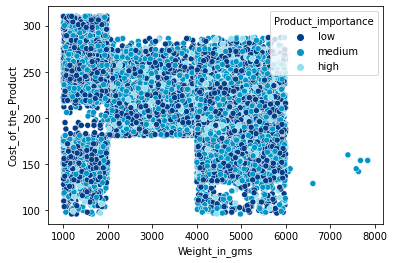

In [28]:
sns.scatterplot(data=df,x='Weight_in_gms',y='Cost_of_the_Product',hue='Product_importance')

1. 1st scattered plot - It's clearly visible that there are few outliers, products having low cost but very heavy weight, this is happening in ship mode of delivery and one outlier is also for road delivery mode.
2. 2nd scattered plot - The outliers belongs to medium importance products list.

In [29]:
Outliers=df[(df['Cost_of_the_Product']<= 180.0) & (df['Weight_in_gms']>6200.0)]
Outliers

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
200,D,Ship,2,3,142.0,3.0,medium,F,13.0,7640.0,1.0,Delayed
201,F,Ship,2,2,154.0,3.0,medium,M,13.0,7846.0,1.0,Delayed
207,F,Ship,2,3,145.0,3.0,medium,F,13.0,7588.0,1.0,Delayed
215,B,Ship,2,5,160.0,3.0,medium,F,13.0,7401.0,1.0,Delayed
247,F,Ship,2,4,154.0,3.0,medium,F,13.0,7684.0,1.0,Delayed
259,F,Road,2,2,129.0,3.0,medium,F,13.0,6614.0,1.0,Delayed


In [30]:
#droping outliers observed in scatterplot
df.drop(df[(df['Cost_of_the_Product']<= 180.0) & (df['Weight_in_gms']>6200.0)].index,inplace=True)

In [92]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
2,D,Flight,4,2,177.0,3.0,low,0,13.0,1233.0,1.0,Delayed
3,F,Flight,4,5,216.0,2.0,low,1,13.0,3088.0,1.0,Delayed
4,A,Flight,2,2,183.0,4.0,low,1,13.0,3374.0,1.0,Delayed
5,B,Flight,3,3,176.0,4.0,medium,1,10.0,1177.0,1.0,Delayed
6,C,Flight,2,2,184.0,3.0,medium,0,13.0,2484.0,1.0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
10996,A,Ship,4,1,252.0,5.0,medium,0,1.0,1538.0,1.0,Delayed
10997,B,Ship,4,1,232.0,5.0,medium,0,6.0,1247.0,0.0,On Time
10998,C,Ship,5,4,242.0,5.0,low,0,4.0,1155.0,0.0,On Time
10999,F,Ship,5,2,223.0,6.0,medium,1,2.0,1210.0,0.0,On Time


In [32]:
 
# One-hot encoding
df_encoded=pd.get_dummies(df,columns= ['Mode_of_Shipment','Warehouse_block','Product_importance'])
df_encoded

# Binary encoding
df_encoded['Gender'] = df_encoded['Gender'].replace({'F': 0, 'M': 1})
   

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium
2,4,2,177.0,3.0,0,13.0,1233.0,1.0,Delayed,1,0,0,0,0,0,1,0,0,1,0
3,4,5,216.0,2.0,1,13.0,3088.0,1.0,Delayed,1,0,0,0,0,0,0,1,0,1,0
4,2,2,183.0,4.0,1,13.0,3374.0,1.0,Delayed,1,0,0,1,0,0,0,0,0,1,0
5,3,3,176.0,4.0,1,10.0,1177.0,1.0,Delayed,1,0,0,0,1,0,0,0,0,0,1
6,2,2,184.0,3.0,0,13.0,2484.0,1.0,Delayed,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,4,1,252.0,5.0,0,1.0,1538.0,1.0,Delayed,0,0,1,1,0,0,0,0,0,0,1
10997,4,1,232.0,5.0,0,6.0,1247.0,0.0,On Time,0,0,1,0,1,0,0,0,0,0,1
10998,5,4,242.0,5.0,0,4.0,1155.0,0.0,On Time,0,0,1,0,0,1,0,0,0,1,0
10999,5,2,223.0,6.0,1,2.0,1210.0,0.0,On Time,0,0,1,0,0,0,0,1,0,0,1


In [33]:
df_encoded.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Reached', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium'],
      dtype='object')

## Model Building

In [34]:
X=df_encoded[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium']]
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium
2,4,2,177.0,3.0,0,13.0,1233.0,1,0,0,0,0,0,1,0,0,1,0
3,4,5,216.0,2.0,1,13.0,3088.0,1,0,0,0,0,0,0,1,0,1,0
4,2,2,183.0,4.0,1,13.0,3374.0,1,0,0,1,0,0,0,0,0,1,0
5,3,3,176.0,4.0,1,10.0,1177.0,1,0,0,0,1,0,0,0,0,0,1
6,2,2,184.0,3.0,0,13.0,2484.0,1,0,0,0,0,1,0,0,0,0,1


In [35]:
y=df_encoded[['Reached.on.Time_Y.N']]
y.head()

,Reached.on.Time_Y.N
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score , plot_roc_curve, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

dt = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=7)
ad = AdaBoostClassifier()
kn = KNeighborsClassifier()
lg = LogisticRegression()
svm= SVC(random_state = 43, C = 10, gamma = 0.1, kernel ='rbf')
rf= RandomForestClassifier()
xg = XGBClassifier()
#xgb = XGBClassifier(use_label_encoder=False, random_state = 43)

models = [ dt,ad,kn,rf,lg]
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores = cross_val_score(model, X, y, cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(3)
    ROC = metrics.roc_auc_score(y_test, y_pred).round(3)
    #f1score = metrics.f1_score(y_test, y_pred).round(3)
    print(model, '\n', 'Accuracy:', accuracy,'\n', 'mean_CV_score:',scores, '\n' , 'ROC:', ROC,'\n')

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=100) 
 Accuracy: 0.673 
 mean_CV_score: 0.564 
 ROC: 0.716 



/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

AdaBoostClassifier() 
 Accuracy: 0.664 
 mean_CV_score: 0.59 
 ROC: 0.677 



/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

KNeighborsClassifier() 
 Accuracy: 0.642 
 mean_CV_score: 0.623 
 ROC: 0.634 



<ipython-input-73-9c89d4657ac6>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d ar

RandomForestClassifier() 
 Accuracy: 0.658 
 mean_CV_score: 0.603 
 ROC: 0.662 



/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

LogisticRegression() 
 Accuracy: 0.642 
 mean_CV_score: 0.598 
 ROC: 0.623 



/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Adaboost model has given good accuracy and ROC as well

In [74]:
ad.feature_importances_  

array([0.  , 0.02, 0.12, 0.06, 0.  , 0.04, 0.74, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ])

Text(0.5, 0, 'Relative Importance')

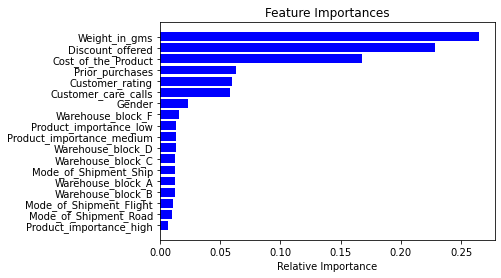

In [86]:
features=x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

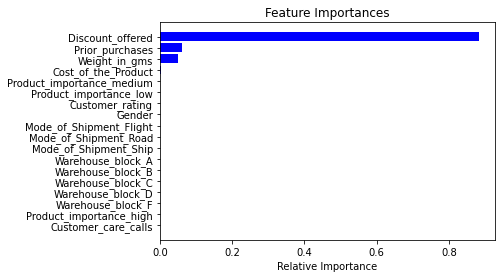

In [87]:
features=x_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

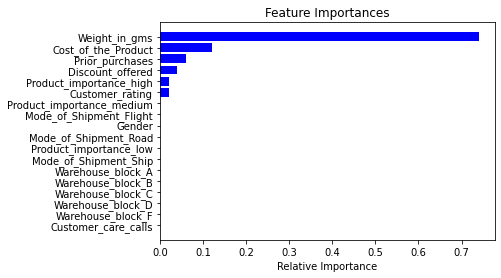

In [75]:
features=x_train.columns
importances = ad.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Creating Adaboost classifier - using random forest as weak learner here

In [76]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=rf,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.660300136425648


Text(0.5, 0, 'Relative Importance')

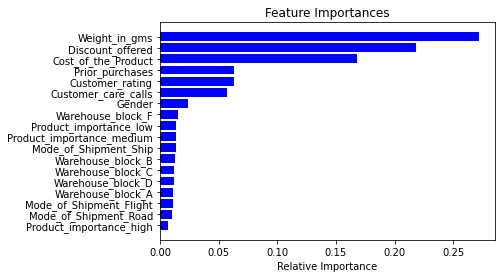

In [85]:
features=x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

This method doesn't much improve the accuracy or information

### Decision Tree visualization

In [79]:
from sklearn import tree

In [80]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_5 <= 10.50
|   |--- feature_6 <= 4121.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 1.0
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 0.0
|   |--- feature_6 >  4121.50
|   |   |--- feature_2 <= 214.50
|   |   |   |--- class: 0.0
|   |   |--- feature_2 >  214.50
|   |   |   |--- class: 0.0
|--- feature_5 >  10.50
|   |--- class: 1.0



In [82]:
Features=X.columns
Features
target=df['Reached'].unique().tolist()
target

['Delayed', 'On Time']

### Decision Tree with Gini Index

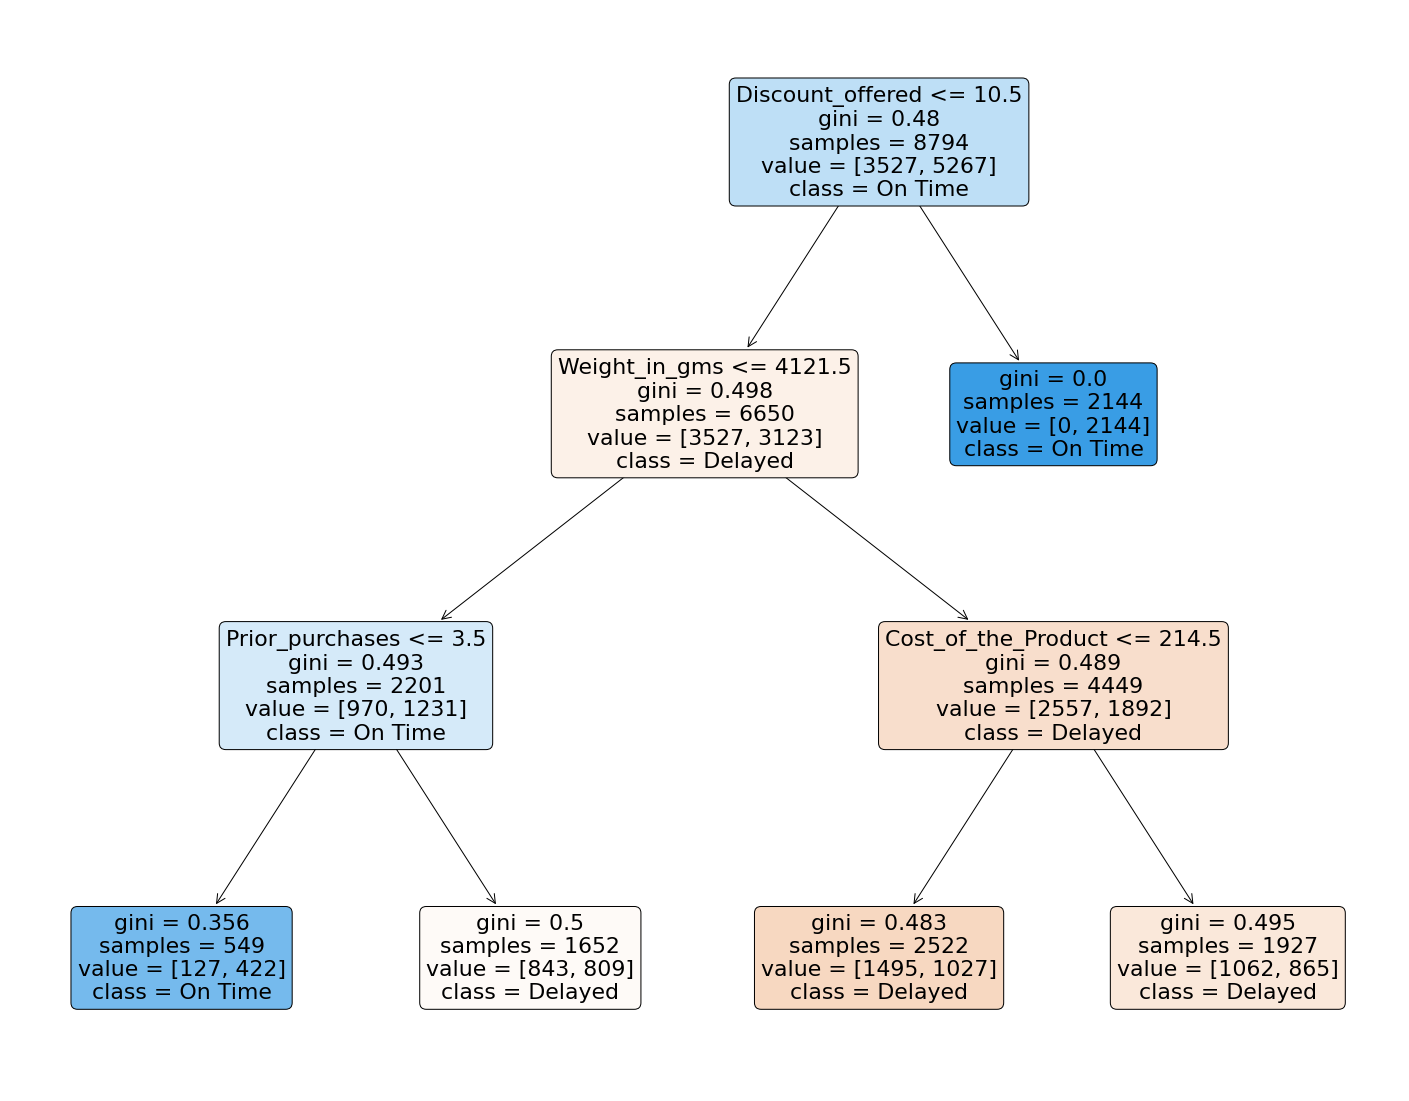

In [83]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
_ = tree.plot_tree(dt, 
          feature_names = Features, 
          class_names = target, 
          filled = True, 
          rounded = True)

In [70]:
fig.savefig("decistion_tree.png")

In [91]:
#Checking cofusion Metrics
print(confusion_matrix(y_test,y_pred))

[[617 292]
 [455 835]]


# PCA

In [93]:
PCA_set= df_encoded.loc[:,['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium']]

In [94]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(PCA_set)
PCA_set

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium
2,4,2,177.0,3.0,0,13.0,1233.0,1,0,0,0,0,0,1,0,0,1,0
3,4,5,216.0,2.0,1,13.0,3088.0,1,0,0,0,0,0,0,1,0,1,0
4,2,2,183.0,4.0,1,13.0,3374.0,1,0,0,1,0,0,0,0,0,1,0
5,3,3,176.0,4.0,1,10.0,1177.0,1,0,0,0,1,0,0,0,0,0,1
6,2,2,184.0,3.0,0,13.0,2484.0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,4,1,252.0,5.0,0,1.0,1538.0,0,0,1,1,0,0,0,0,0,0,1
10997,4,1,232.0,5.0,0,6.0,1247.0,0,0,1,0,1,0,0,0,0,0,1
10998,5,4,242.0,5.0,0,4.0,1155.0,0,0,1,0,0,1,0,0,0,1,0
10999,5,2,223.0,6.0,1,2.0,1210.0,0,0,1,0,0,0,0,1,0,0,1


In [95]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [96]:
set = pd.DataFrame(x,columns=feat_cols)

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_values = pca.fit_transform(x)

In [98]:
principal_df = pd.DataFrame(data = pca_values
             , columns = ['principal component 1', 'principal component 2'])

In [99]:
principal_df.tail()

,principal component 1,principal component 2
10988,-0.985459,-0.899983
10989,-1.169780,-1.009872
10990,1.846715,-0.870917
10991,-0.838093,-0.868328
10992,1.106682,-0.981607


## Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(PCA_set)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow")
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=3, init="k-means++")
cluster=kmeans.fit_predict(PCA_set)
cluster

In [ ]:
pd.Series(cluster).value_counts()

In [ ]:
df['label']=cluster

In [ ]:
df['label'].unique()

In [ ]:
from mpl_toolkits import mplot3d


In [ ]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Prior_purchases[df.label == 0], df["Cost_of_the_Product"][df.label == 0], 
           df["Discount_offered"][df.label == 0], c='blue', s=60)
ax.scatter(df.Prior_purchases[df.label == 1], df["Cost_of_the_Product"][df.label == 1], 
           df["Discount_offered"][df.label == 1], c='red', s=60)
ax.scatter(df.Prior_purchases[df.label == 2], df["Cost_of_the_Product"][df.label == 2], 
           df["Discount_offered"][df.label == 2], c='green', s=60)

ax.view_init(30, 185)

plt.show()

### High Payment Buyers Analysis

In [ ]:
High_Payment_buyers = df[df['Cost_of_the_Product']>210]
High_Payment_buyers

In [ ]:
#Categorical Data Analysis
Data = High_Payment_buyers[['Product_importance','Reached','Gender','Prior_purchases']]
i = 1
plt.figure(figsize=(25,15))
for col in Data:
    plt.subplot(3,6,i)
    x=Data[col].value_counts()
    plot = x.plot.pie(fontsize=10, autopct='%1.0f%%')
    i +=1

57% of orders are getting delayed for high payment buyers. 

In [ ]:
sns.barplot(data=High_Payment_buyers,x='Prior_purchases',y='Cost_of_the_Product')

All the high payment buyers are repeat customers, they are either purchasing for 2nd time or more.

In [ ]:
Customer_with_bad_experience = High_Payment_buyers[ 
                    (High_Payment_buyers['Customer_care_calls']>3) & 
                    (High_Payment_buyers['Reached']=='Delayed')].sort_values(by=[
    'Customer_care_calls','Customer_rating'])

In [ ]:
Customer_with_bad_experience['Customer_care_calls'].value_counts()

In [ ]:
These customers has called more than 3 times still the order delayed for them. 